In [12]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_V1.xlsx")
allocine.head()

,ID,acteurs,genre,realisateur,scenariste,duree,date,annee,titre_original,note_presse,note_spectateurs,pays,distributeur,budget,titre,premiere_semaine_france,cumul_france,premiere_semaine_US,cumul_US,year
0,59308,"Thierry Lhermitte, Gérard Jugnot, Josiane Bala...",Comédie,Patrice Leconte,"Michel Blanc, Marie-Anne Chazel, Thierry Lherm...",97.0,2006-02-01 00:00:00,2006.0,NaN,2.7,1.4,France,Warner Bros. France,35 000 000 â‚¬,Les Bronzés 3 amis pour la vie,3906694.0,10344520.0,NaN,NaN,2006.0
1,215097,"Daisy Ridley, John Boyega, Adam Driver, Harris...","Action, Aventure, Science Fiction",J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...",135.0,2015-12-16 00:00:00,2015.0,Star Wars: Episode VII - The Force Awakens,4.0,3.6,U.S.A.,The Walt Disney Company France,$245.000.000 dlls,Star Wars - Le Réveil de la Force,3801235.0,10404435.0,247966675.0,933674012.0,2015.0
2,28537,"Gérard Depardieu, Christian Clavier, Jamel Deb...",Comédie,Alain Chabat,"Alain Chabat, Albert Uderzo, René Goscinny",112.0,2002-01-30 00:00:00,2002.0,NaN,3.8,4.1,France,Pathé,50 300 000 â‚¬,Astérix et Obélix : Mission Cléopà¢tre,3685097.0,14194819.0,NaN,NaN,2002.0
3,232669,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Action, Aventure, Science Fiction","Joe Russo, Anthony Russo","Christopher Markus, Stephen McFeely",181.0,2019-04-24 00:00:00,2019.0,NaN,3.2,4.2,U.S.A.,The Walt Disney Company France,NaN,Avengers: Endgame,3426471.0,6823130.0,357115007.0,847881150.0,2019.0
4,40623,"Hayden Christensen, Ewan McGregor, Natalie Por...","Action, Aventure, Science Fiction",George Lucas,George Lucas,140.0,2005-05-18 00:00:00,2005.0,Star Wars: Episode III - Revenge of the Sith,3.9,4.2,U.S.A.,20th Century Studios,115 000 000 $,Star Wars : Episode III - La Revanche des Sith,3303005.0,7210776.0,108435841.0,377864535.0,2005.0


In [11]:
# Vérification du nombre de valeurs manquantes
allocine.isna().sum()

ID                            0
acteurs                    1820
genre                       363
realisateur                 401
scenariste                 1239
duree                       556
date                        450
annee                       450
titre_original             8017
note_presse                 442
note_spectateurs           1840
pays                        361
distributeur               1170
budget                     9098
titre                       336
premiere_semaine_france    1387
cumul_france               1389
premiere_semaine_US        8991
cumul_US                   9096
year                        336
dtype: int64

In [13]:
# Calcul du nombre de lignes et de colonnes
allocine.shape

(12414, 20)

In [16]:
# Suppression des lignes qui n'ont pas de titre et pas de date
allocine = allocine.dropna(subset=['titre','date'])

In [15]:
# Nouveau calcul du nombre de lignes et de colonnes
allocine.shape

(11964, 20)

In [6]:
# Utiliser la méthode duplicated pour identifier les doublons
doublons = allocine[allocine.duplicated(['titre', 'date'], keep=False)]

# Afficher les lignes qui contiennent des doublons dans la colonne 'titre et date'
print("Lignes avec des doublons :")
print(doublons)

Lignes avec des doublons :
Empty DataFrame
Columns: [ID, acteurs, genre, realisateur, scenariste, duree, date, annee, titre_original, note_presse, note_spectateurs, pays, distributeur, budget, titre, premiere_semaine_france, cumul_france, premiere_semaine_US, cumul_US, year]
Index: []


In [21]:
# On déduit du code précédent qu'il n'y a pas de doublon de films dans le fichier

In [17]:
# Nouvelle vérification du nombre de valeurs manquantes et du type des variables
allocine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11964 entries, 0 to 12413
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       11964 non-null  int64  
 1   acteurs                  10189 non-null  object 
 2   genre                    11839 non-null  object 
 3   realisateur              11816 non-null  object 
 4   scenariste               11017 non-null  object 
 5   duree                    11786 non-null  float64
 6   date                     11964 non-null  object 
 7   annee                    11964 non-null  float64
 8   titre_original           4386 non-null   object 
 9   note_presse              11917 non-null  float64
 10  note_spectateurs         10573 non-null  float64
 11  pays                     11953 non-null  object 
 12  distributeur             11234 non-null  object 
 13  budget                   3304 non-null   object 
 14  titre                    11

In [18]:
#Convertir la colonne 'date' en format datetime
allocine['date'] = pd.to_datetime(allocine['date'], format='%Y-%m-%d', errors='coerce')

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
dtype: object

In [19]:
# Créer les nouvelles colonnes 'realease_year', 'release_month', 'release_day'
allocine.loc[:, 'release_year'] = allocine['date'].dt.year
allocine.loc[:, 'release_month'] = allocine['date'].dt.month
allocine.loc[:, 'release_day'] = allocine['date'].dt.day

allocine.head()

,ID,acteurs,genre,realisateur,scenariste,duree,date,annee,titre_original,note_presse,...,budget,titre,premiere_semaine_france,cumul_france,premiere_semaine_US,cumul_US,year,release_year,release_month,release_day
0,59308,"Thierry Lhermitte, Gérard Jugnot, Josiane Bala...",Comédie,Patrice Leconte,"Michel Blanc, Marie-Anne Chazel, Thierry Lherm...",97.0,2006-02-01,2006.0,NaN,2.7,...,35 000 000 â‚¬,Les Bronzés 3 amis pour la vie,3906694.0,10344520.0,NaN,NaN,2006.0,2006.0,2.0,1.0
1,215097,"Daisy Ridley, John Boyega, Adam Driver, Harris...","Action, Aventure, Science Fiction",J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...",135.0,2015-12-16,2015.0,Star Wars: Episode VII - The Force Awakens,4.0,...,$245.000.000 dlls,Star Wars - Le Réveil de la Force,3801235.0,10404435.0,247966675.0,933674012.0,2015.0,2015.0,12.0,16.0
2,28537,"Gérard Depardieu, Christian Clavier, Jamel Deb...",Comédie,Alain Chabat,"Alain Chabat, Albert Uderzo, René Goscinny",112.0,2002-01-30,2002.0,NaN,3.8,...,50 300 000 â‚¬,Astérix et Obélix : Mission Cléopà¢tre,3685097.0,14194819.0,NaN,NaN,2002.0,2002.0,1.0,30.0
3,232669,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Action, Aventure, Science Fiction","Joe Russo, Anthony Russo","Christopher Markus, Stephen McFeely",181.0,2019-04-24,2019.0,NaN,3.2,...,NaN,Avengers: Endgame,3426471.0,6823130.0,357115007.0,847881150.0,2019.0,2019.0,4.0,24.0
4,40623,"Hayden Christensen, Ewan McGregor, Natalie Por...","Action, Aventure, Science Fiction",George Lucas,George Lucas,140.0,2005-05-18,2005.0,Star Wars: Episode III - Revenge of the Sith,3.9,...,115 000 000 $,Star Wars : Episode III - La Revanche des Sith,3303005.0,7210776.0,108435841.0,377864535.0,2005.0,2005.0,5.0,18.0


In [22]:
# Suite à cette transformation, suppression des lignes qui ont des dates en NA
allocine = allocine.dropna(subset=['date'])

In [23]:
# # Calcul du nombre de lignes et de colonnes après les dernière modifications
allocine.shape

(11827, 23)

In [24]:
# Trabsformation du type de variable
allocine['release_year'] = allocine['release_year'].astype(int)
allocine['release_month'] = allocine['release_month'].astype(int)
allocine['release_day'] = allocine['release_day'].astype(int)

allocine.dtypes

ID                                  int64
acteurs                            object
genre                              object
realisateur                        object
scenariste                         object
duree                             float64
date                       datetime64[ns]
annee                             float64
titre_original                     object
note_presse                       float64
note_spectateurs                  float64
pays                               object
distributeur                       object
budget                             object
titre                              object
premiere_semaine_france           float64
cumul_france                      float64
premiere_semaine_US               float64
cumul_US                          float64
year                              float64
release_year                        int32
release_month                       int32
release_day                         int32
dtype: object

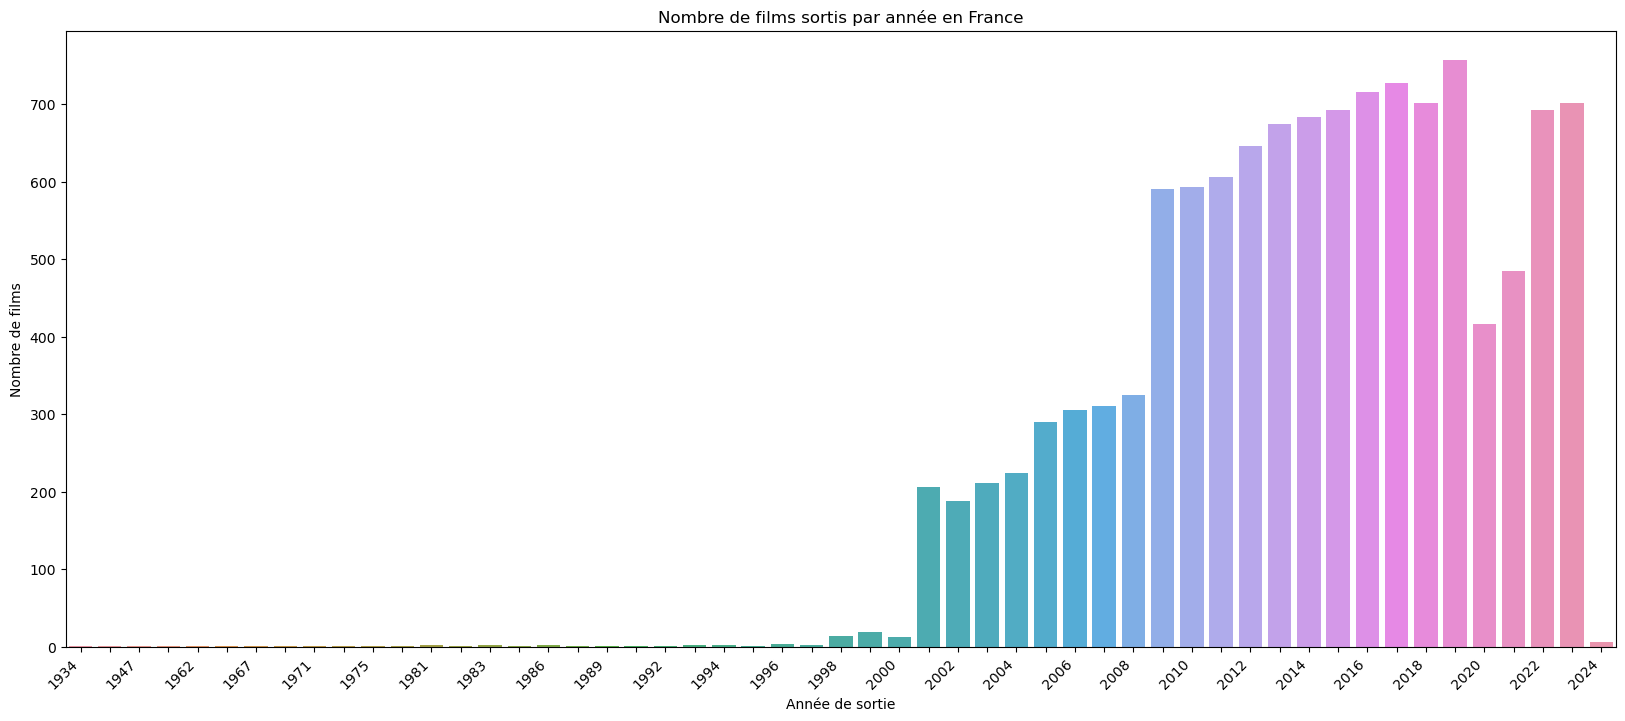

In [28]:
# Evolution du nombre de films sortis par an avec seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize= (20, 8))
plot = sns.countplot(x='release_year', data=allocine)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Sélectionner une année sur deux pour les étiquettes
every_nth = 2
for n, label in enumerate(plot.get_xticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

# Ajouter des titres et libellés
plt.title('Nombre de films sortis par année en France')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')

plt.show()

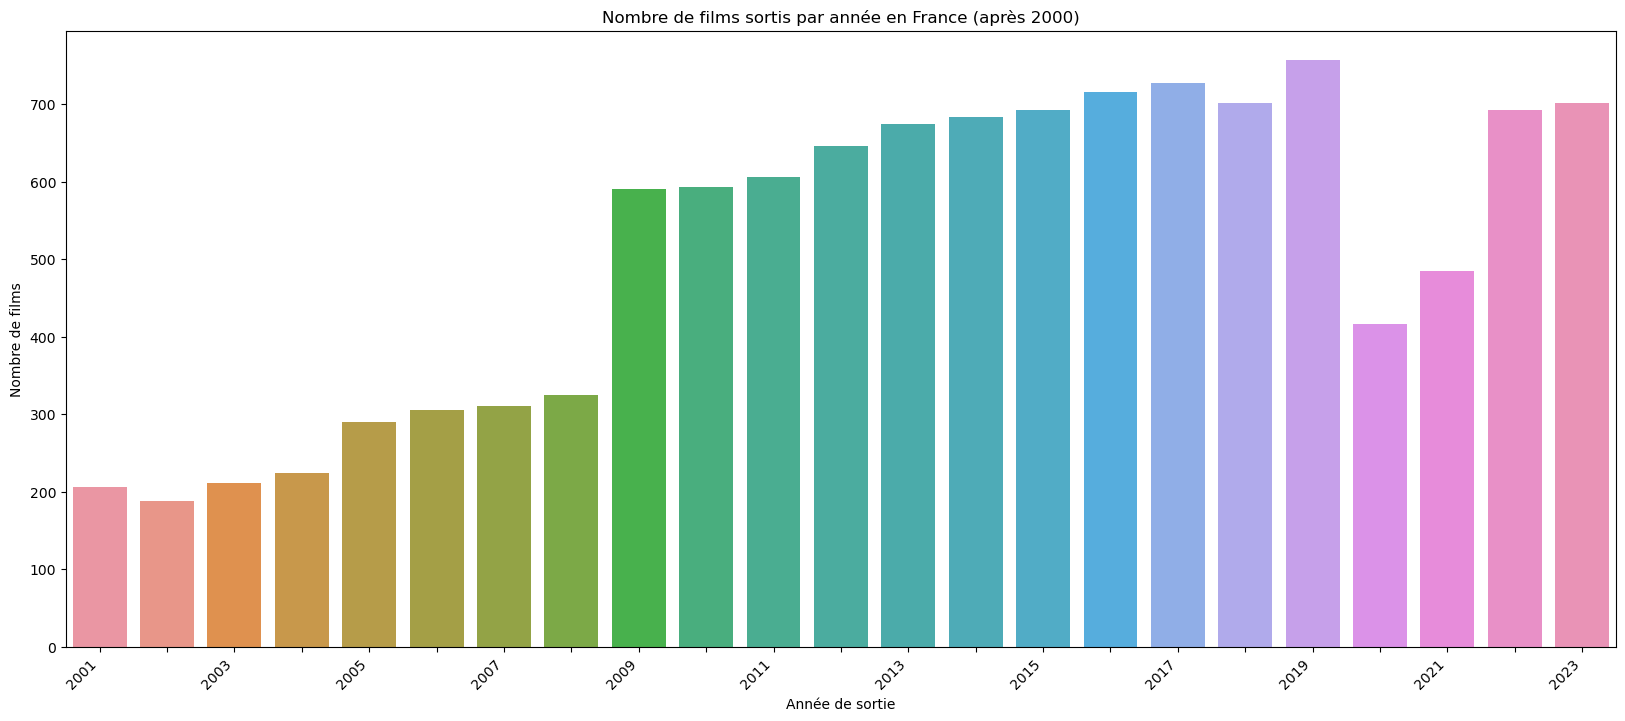

In [29]:
# Evolution du nombre de films sortis par an depuis 2001 avec seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que allocine est votre DataFrame

# Filtrer les données pour inclure uniquement les films sortis après 2000
filtered_data = allocine[(allocine['release_year'] > 2000) & (allocine['release_year'] <= 2023)]

# Définir la taille de la figure
plt.figure(figsize=(20, 8))

# Utiliser countplot avec les données filtrées
plot = sns.countplot(x='release_year', data=filtered_data)

# Ajuster les étiquettes pour les faire pivoter
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Sélectionner une année sur deux pour les étiquettes
every_nth = 2
for n, label in enumerate(plot.get_xticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

# Ajouter des titres et libellés
plt.title('Nombre de films sortis par année en France (après 2000)')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')

plt.show()

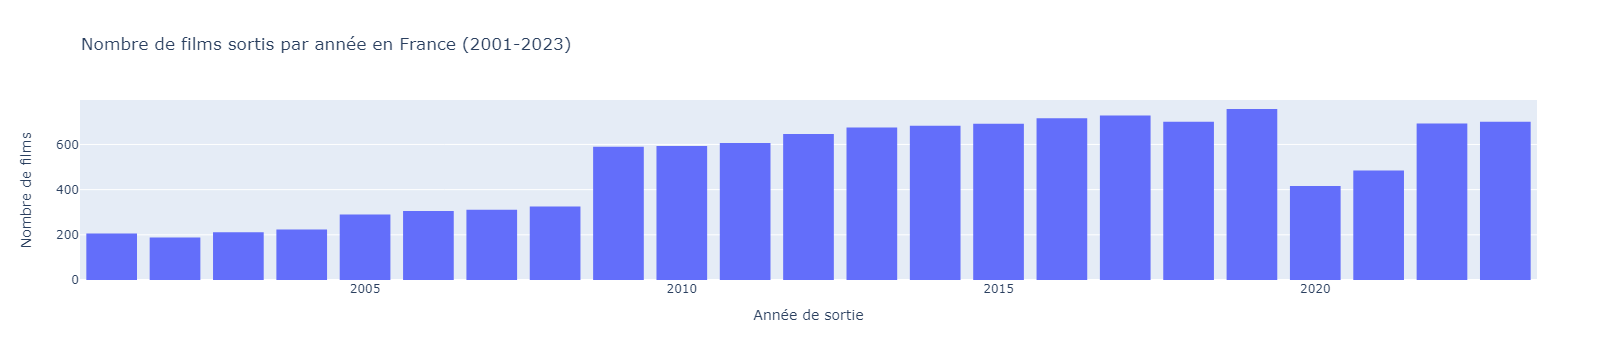

In [31]:
# Evolution du nombre de films sortis par an depuis 2001 avec plotly

import plotly.express as px

# Filtrer les données pour inclure uniquement les films sortis entre 2001 et 2023
filtered_data = allocine[(allocine['release_year'] > 2000) & (allocine['release_year'] <= 2023)]

# Créer un graphique avec Plotly
fig = px.histogram(
    filtered_data,
    x='release_year',
    nbins=len(filtered_data['release_year'].unique()),  # Nombre de barres basé sur le nombre d'années uniques
    title='Nombre de films sortis par année en France (2001-2023)',
    labels={'release_year': 'Année de sortie', 'count': 'Nombre de films'}
)

# Ajuster les étiquettes pour les faire pivoter
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        ticktext=[str(year) for year in filtered_data['release_year'].unique()][::2]
    ),
    xaxis_title="Année de sortie",
    yaxis_title="Nombre de films",
    bargap=0.2,  # Espace entre les barres
)

fig.show()

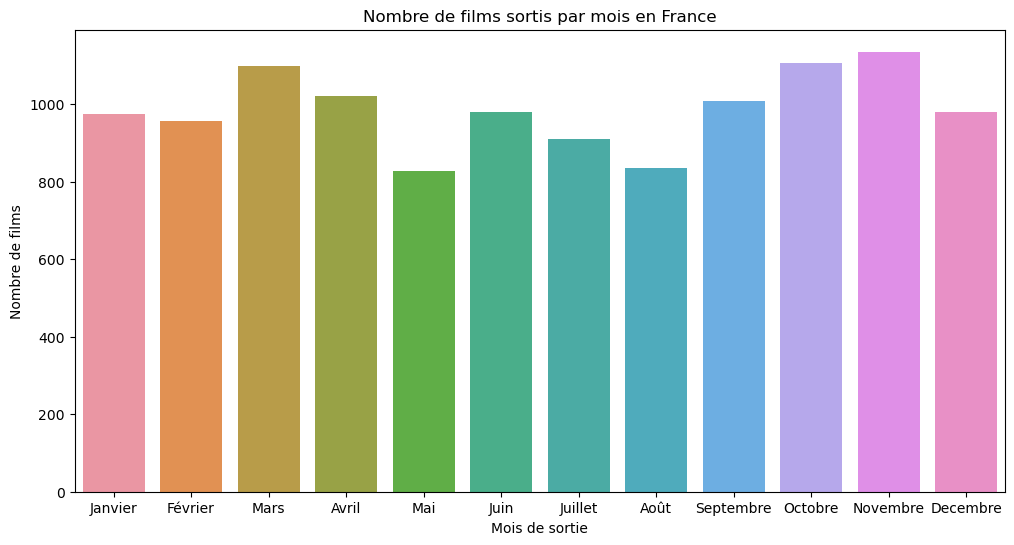

In [33]:
# Nombre de films sortis par mois en France avec seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Ajouter une colonne 'month_name' avec les noms des mois
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Decembre']
allocine['month_name'] = allocine['release_month'].apply(lambda x: month_names[int(x) - 1])

# Créer le graphique avec Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='month_name', data=allocine, order=month_names)

# Ajouter des titres et libellés
plt.title('Nombre de films sortis par mois en France')
plt.xlabel('Mois de sortie')
plt.ylabel('Nombre de films')

# Afficher le graphique
plt.show()

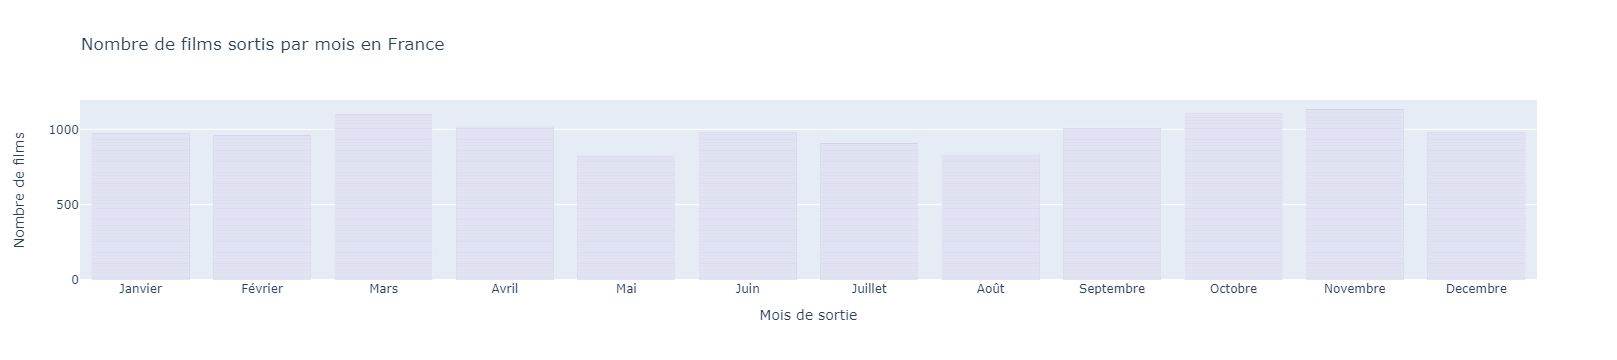

In [36]:
# Nombre de films sortis par mois en France avec plotly

import plotly.express as px

# Ajouter une colonne 'month_name' avec les noms des mois
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
               'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Decembre']
allocine['month_name'] = allocine['release_month'].apply(lambda x: month_names[int(x) - 1])

# Créer un graphique avec Plotly
fig = px.bar(
    allocine,
    x='month_name',
    category_orders={'month_name': month_names},  # S'assurer que l'ordre des mois est respecté
    title='Nombre de films sortis par mois en France',
    labels={'month_name': 'Mois de sortie', 'count': 'Nombre de films'},
    color_discrete_sequence=['purple']  # Définir la couleur des barres en orange
)

# Ajuster l'opacité pour une couleur plus vive
fig.update_traces(marker={'opacity': 1.0})  # Opacité à 100%

# Ajuster les étiquettes pour les faire pivoter
fig.update_layout(
    xaxis_title="Mois de sortie",
    yaxis_title="Nombre de films",
    bargap=0.2  # Espace entre les barres
)

fig.show()

In [16]:
# Les mois avec le plus de sorties sont Mars, Octobre et Novembre. En Mars, le Printemps du Cinéma (5€/ticket pendant 3J) peut pousser les distributeurs à sortir plus de films.
# Entre juin et juillet, La Fête du Cinéma ne semble pas avoir d'effet aussi visible. 
# Le mois d'août fait partie des mois présentant le moins de sorties (vacances d'été) avec le mois de mai (ponts, vacances de Pâques)

In [31]:
# Top 5 des films avec la meilleure première semaine en France
top5_premiere_semaine = allocine.sort_values(by='premiere_semaine_france', ascending=False).head(5)

print("Top 5 des films avec la meilleure première semaine en France :")
print(top5_premiere_semaine[['titre', 'premiere_semaine_france']])

Top 5 des films avec la meilleure première semaine en France :
                                            titre  premiere_semaine_france
0                  Les Bronzés 3 amis pour la vie                3906694.0
1               Star Wars - Le Réveil de la Force                3801235.0
2          Astérix et Obélix : Mission Cléopà¢tre                3685097.0
3                               Avengers: Endgame                3426471.0
4  Star Wars : Episode III - La Revanche des Sith                3303005.0


In [32]:
# Top 5 des films avec le meilleur cumul en France
top5_cumul = allocine.sort_values(by='cumul_france', ascending=False).head(5)

print("Top 5 des films avec le meilleur cumul en France :")
print(top5_cumul[['titre', 'cumul_france']])

Top 5 des films avec le meilleur cumul en France :
                                       titre  cumul_france
567                Bienvenue chez les Ch'tis    20328052.0
3553                            Intouchables    19275425.0
19                                    Avatar    14638741.0
2     Astérix et Obélix : Mission Cléopà¢tre    14194819.0
15                 Avatar : la voie de l'eau    14000537.0
